In [344]:
import pandas as pd
datos_siniestros = pd.read_excel("2015_2019_siniestralidad_vial.xlsx", sheet_name="SINIESTROS")
datos_siniestros.head()

,CODIGO_SINIESTRO,FECHA,HORA,GRAVEDAD,CLASE,CHOQUE_CON,OBJETO_FIJO,DIRECCION,TOTAL_MUERTOS,TOTAL_HERIDOS,LOCALIDAD,DISENO_LUGAR
0,4401423,01/01/2015,09:45:00,Con Heridos,Choque,Vehiculo,NaN,CL 66A-KR 76 02,0,2,Engativá,Interseccion
1,4401425,01/01/2015,13:25:00,Solo Daños,Choque,Vehiculo,NaN,CL 143A-KR 142 02,0,0,Suba,Tramo de Via
2,4401430,01/01/2015,07:15:00,Con Heridos,Volcamiento,NaN,NaN,KR 19D-CL 62 S 02,0,1,Ciudad Bolívar,Tramo de Via
3,4401433,01/01/2015,20:30:00,Solo Daños,Choque,Vehiculo,NaN,AK 7-CL 43 33,0,0,Chapinero,Tramo de Via
4,4401437,01/01/2015,12:50:00,Solo Daños,Choque,Vehiculo,NaN,DG 77A-AK 18D 02,0,0,Ciudad Bolívar,Tramo de Via


In [345]:
# organizar numericamente el codigo de siniestro
siniestros = datos_siniestros.sort_values("CODIGO_SINIESTRO")
siniestros.head()

,CODIGO_SINIESTRO,FECHA,HORA,GRAVEDAD,CLASE,CHOQUE_CON,OBJETO_FIJO,DIRECCION,TOTAL_MUERTOS,TOTAL_HERIDOS,LOCALIDAD,DISENO_LUGAR
50,4401419,02/01/2015,13:00:00,Con Heridos,Caida de ocupante,NaN,NaN,AV AVENIDA BOYACA-CL 49A 76,0,1,Tunjuelito,Tramo de Via
10,4401420,01/01/2015,13:00:00,Solo Daños,Choque,Vehiculo,NaN,KR 17A-CL 63B 02,0,0,Ciudad Bolívar,Tramo de Via
42,4401421,02/01/2015,11:15:00,Con Heridos,Atropello,NaN,NaN,AV AVENIDA CIUDAD DE CALI-CL 8A 13,0,2,Kennedy,Tramo de Via
43,4401422,02/01/2015,21:30:00,Con Heridos,Choque,Vehiculo,NaN,KR 107-CL 79B 41,0,1,Engativá,Tramo de Via
0,4401423,01/01/2015,09:45:00,Con Heridos,Choque,Vehiculo,NaN,CL 66A-KR 76 02,0,2,Engativá,Interseccion


Cantidad de registros de Accidentes en el xlsx

In [346]:
len(siniestros.index)

173443

Accidentes por localidad

In [347]:
# Lista de las localides de Bogotá
localides = siniestros["LOCALIDAD"].unique()
print("Número de Localides", len(localides))
for i in range(len(localides)):
    print(i + 1, localides[i])

Número de Localides 20
1 Tunjuelito
2 Ciudad Bolívar
3 Kennedy
4 Engativá
5 Chapinero
6 Suba
7 Puente Aranda
8 Bosa
9 Fontibón
10 Los Mártires
11 Santa Fe
12 San Cristóbal
13 Usme
14 La Candelaria
15 Usaquén
16 Teusaquillo
17 Barrios Unidos
18 Antonio Nariño
19 Rafael Uribe Uribe
20 Sumapaz


In [348]:
# Agrupar Accidentes por Localidad
localidades_accidentes = siniestros.groupby(by = "LOCALIDAD").size()
localidades_accidentes = localidades_accidentes.to_frame()
localidades_accidentes = localidades_accidentes.rename(columns = {0: "Accidentes"})
localidades_accidentes = localidades_accidentes.reset_index()

In [349]:
localidades_accidentes.columns
localidades_accidentes

,LOCALIDAD,Accidentes
0,Antonio Nariño,3431
1,Barrios Unidos,9462
2,Bosa,8274
3,Chapinero,10625
4,Ciudad Bolívar,6798
5,Engativá,17627
6,Fontibón,13883
7,Kennedy,19451
8,La Candelaria,901
9,Los Mártires,5902


Total de Accidentes


In [350]:
# Corroborar total de los datos
print("Total accidentes")
localidades_accidentes["Accidentes"].sum()


Total accidentes


173443

Coordenadas de las localidades

In [351]:
import geopandas as gpd
import matplotlib.pyplot as plt
from geopandas import GeoDataFrame

In [352]:
# se guardan las coordenadas de las localidades
coordenadas_localidad = "poligonos-localidades.geojson"
map_localidad = gpd.read_file(coordenadas_localidad)


In [353]:
# se uniran las coordenadas en formato geojson al dataframe de accidentes por localidad
# se extra el nombre de la localidad y sus coordenadas del dataframe
columnas_map =  ["Nombre de la localidad","geometry"]
map_localidad = map_localidad[columnas_map]
map_localidad = map_localidad.sort_values("Nombre de la localidad")
map_localidad = map_localidad.reset_index()
map_localidad = map_localidad.rename(columns = {"Nombre de la localidad" : "LOCALIDADES"})
map_localidad

,index,LOCALIDADES,geometry
0,12,ANTONIO NARIÑO,"MULTIPOLYGON (((-74.13075 4.59335, -74.13075 4..."
1,7,BARRIOS UNIDOS,"MULTIPOLYGON (((-74.05725 4.68684, -74.05725 4..."
2,18,BOSA,"MULTIPOLYGON (((-74.18567 4.64705, -74.18568 4..."
3,10,CANDELARIA,"MULTIPOLYGON (((-74.06621 4.60317, -74.06621 4..."
4,11,CHAPINERO,"MULTIPOLYGON (((-74.01089 4.66358, -74.01090 4..."
5,0,CIUDAD BOLIVAR,"MULTIPOLYGON (((-74.18135 4.58892, -74.18092 4..."
6,9,ENGATIVA,"MULTIPOLYGON (((-74.15547 4.71798, -74.15547 4..."
7,8,FONTIBON,"MULTIPOLYGON (((-74.10342 4.65351, -74.11768 4..."
8,3,KENNEDY,"MULTIPOLYGON (((-74.11830 4.63741, -74.11854 4..."
9,5,LOS MARTIRES,"MULTIPOLYGON (((-74.07283 4.61542, -74.07296 4..."


In [357]:
localidad_map = pd.concat([localidades_accidentes,map_localidad], axis = 1)
localidad_map.drop(["LOCALIDADES","index"],axis = 'columns', inplace=True)
localidad_map = GeoDataFrame(localidad_map)
localidad_map.columns
localidad_map

,LOCALIDAD,Accidentes,geometry
0,Antonio Nariño,3431,"MULTIPOLYGON (((-74.13075 4.59335, -74.13075 4..."
1,Barrios Unidos,9462,"MULTIPOLYGON (((-74.05725 4.68684, -74.05725 4..."
2,Bosa,8274,"MULTIPOLYGON (((-74.18567 4.64705, -74.18568 4..."
3,Chapinero,10625,"MULTIPOLYGON (((-74.06621 4.60317, -74.06621 4..."
4,Ciudad Bolívar,6798,"MULTIPOLYGON (((-74.01089 4.66358, -74.01090 4..."
5,Engativá,17627,"MULTIPOLYGON (((-74.18135 4.58892, -74.18092 4..."
6,Fontibón,13883,"MULTIPOLYGON (((-74.15547 4.71798, -74.15547 4..."
7,Kennedy,19451,"MULTIPOLYGON (((-74.10342 4.65351, -74.11768 4..."
8,La Candelaria,901,"MULTIPOLYGON (((-74.11830 4.63741, -74.11854 4..."
9,Los Mártires,5902,"MULTIPOLYGON (((-74.07283 4.61542, -74.07296 4..."


In [355]:
type(localidad_map)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

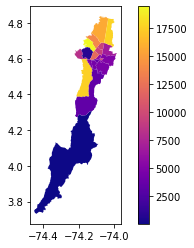

In [359]:
# Control del tamaño de la figura del mapa

# Generar y cargar el mapa
localidad_map.plot(column='Accidentes', cmap='plasma',
              legend=True, zorder=5)

